<a href="https://colab.research.google.com/github/jmperalta89/linkedinJMPERALTA/blob/main/Organizador_de_fotos_y_videos_con_Python_%F0%9F%90%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Organizador de fotos y videos con Python 🐍



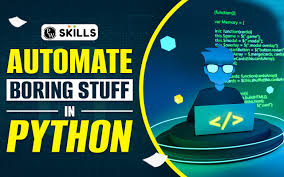

##Bibliotecas necesarias para el script

In [ ]:
# Biblioteca para manejar operaciones en el sistema de archivos
import os
# Biblioteca para mover y copiar archivos
import shutil
# Biblioteca para manejar fechas y tiempos
import datetime
# Biblioteca para manejar imágenes (requiere instalación previa con: pip install Pillow)
from PIL import Image
# Diccionario con etiquetas EXIF de imágenes
from PIL.ExifTags import TAGS
# Biblioteca para manejar tiempos y timestamps
import time
# Biblioteca para manejar estructuras de datos
import pandas as pd

##Funciones

In [ ]:
# Función para obtener la fecha de creación de un archivo (priorizando metadatos EXIF en imágenes)
def get_creation_date(file_path):
    # Verificamos si el archivo es una imagen basada en su extensión
    if file_path.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff', '.bmp')):
        try:
            image = Image.open(file_path)  # Abrimos la imagen
            exif_data = image._getexif()  # Obtenemos los metadatos EXIF
            if exif_data is not None:
                for tag, value in exif_data.items():
                    if TAGS.get(tag) == 'DateTimeOriginal':  # Buscamos la etiqueta con la fecha original
                        return datetime.datetime.strptime(value, '%Y:%m:%d %H:%M:%S')  # Convertimos a formato datetime
        except Exception as e:
            pass  # Si hay un error (ej. imagen sin EXIF), continuamos con otro método

    # Si no es una imagen o no tiene EXIF, obtenemos la fecha de creación desde el sistema de archivos
    timestamp = os.path.getctime(file_path)
    return datetime.datetime.fromtimestamp(timestamp)  # Convertimos el timestamp a formato datetime

# Función principal para organizar fotos según su año de creación
def organize_photos(base_path):
    # Crear una carpeta especial para los archivos sin fecha detectada
    no_date_folder = os.path.join(base_path, 'Sin fecha')
    if not os.path.exists(no_date_folder):
        os.makedirs(no_date_folder)

    # Recorremos todos los archivos en la carpeta base
    for root, dirs, files in os.walk(base_path):
        for file in files:
            file_path = os.path.join(root, file)  # Ruta completa del archivo

            try:
                # Intentamos obtener la fecha de creación del archivo
                creation_date = get_creation_date(file_path)
                year = creation_date.year  # Extraemos el año de la fecha
            except Exception as e:
                # Si falla, movemos el archivo a la carpeta "Sin fecha"
                shutil.move(file_path, no_date_folder)
                continue

            # Crear la carpeta del año si no existe
            year_folder = os.path.join(base_path, str(year))
            if not os.path.exists(year_folder):
                os.makedirs(year_folder)

            # Mover el archivo a la carpeta del año correspondiente
            dest_path = os.path.join(year_folder, file)
            if not os.path.exists(dest_path):  # Verificamos si ya existe un archivo con el mismo nombre
                shutil.move(file_path, dest_path)
            else:
                # Si el archivo ya existe, añadimos un número para evitar sobrescribir
                base, ext = os.path.splitext(file)
                counter = 1
                new_dest_path = os.path.join(year_folder, f"{base}_{counter}{ext}")
                while os.path.exists(new_dest_path):
                    counter += 1
                    new_dest_path = os.path.join(year_folder, f"{base}_{counter}{ext}")
                shutil.move(file_path, new_dest_path)

    # Resumen de archivos organizados por año
    year_summary = {}
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file != "Sin fecha":  # Excluimos la carpeta "Sin fecha"
                year = os.path.basename(root)  # El nombre de la carpeta es el año
                if year not in year_summary:
                    year_summary[year] = 0
                year_summary[year] += 1

    # Imprimir el resumen de organización
    print("Resumen de archivos organizados por año:")
    for year, count in year_summary.items():
        print(f"Año {year}: {count} archivos"

## Ruta a los archivos a organizar

In [ ]:
# Ruta de la carpeta que contiene las fotos y videos
base_path = "F:/FOTOSyVIDEOS"

#Procedo a ejecutar el script!

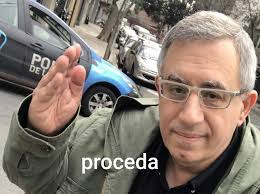

In [ ]:
# Llamamos a la función para organizar los archivos
organize_photos(base_path)